In [18]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from geopy.distance import vincenty

Populating the interactive namespace from numpy and matplotlib


#reading the files TRI data, Zillow All Homes data, zipcode centroid files

In [2]:

data_tri_2015 = pd.read_csv('TRI_2015_NC.csv')
data_zillow_condo = pd.read_csv('Zip_Zhvi_Condominum.csv')
data_region_centroids = pd.read_csv('zipcode/zipcode.csv')

In [3]:
data_columns = ['RegionName','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_zillow_condo = data_zillow_condo.loc[:,(data_columns)]

In [4]:
data_tri_2015.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER
0,2015,27709JMCSNONEIN,1.100120e+11,JMC (USA) INC,ONE INNOVATION DR,RESEARCH TRIANGLE PARK,DURHAM,NC,27709,NaN,...,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,JAPAN METALS & CHEMICALS CO LTD,NaN
1,2015,2803WBRLCM5CRRE,1.100460e+11,BORAL COMPOSITE INC,500 CORRELL ST,EAST SPENCER,ROWAN,NC,28039,NaN,...,0.0,0.0,0.0,0.0,140.00,NaN,PRODUCTION,1.12,BORAL USA,NaN
2,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,0.0,0.0,0.0,0.0,77.33,NaN,PRODUCTION,1.10,ALLEGHENY TECHNOLOGIES INC,949262737.0
3,2015,28328CMPBL224FA,1.100000e+11,CAMPBELL OIL & GAS CO,224 FAISON HWY,CLINTON,SAMPSON,NC,28328,NaN,...,0.0,0.0,0.0,0.0,0.00,NaN,ACTIVITY,1.00,CAMPBELL OIL & GAS CO,NaN
4,2015,28456FDRLPRIEGE,1.100100e+11,INTERNATIONAL PAPER RIEGELWOOD MILL,865 JOHN L.RIEGEL RD,RIEGELWOOD,COLUMBUS,NC,28456,NaN,...,0.0,0.0,0.0,0.0,37080.00,NaN,PRODUCTION,0.97,INTERNATIONAL PAPER CO,1316561.0


In [5]:
data_zillow_condo.rename(columns={'RegionName':'ZIP'},inplace=True)

In [6]:
data_region_centroids.rename(columns = {'zip':'ZIP','latitude':'CENTROID_LATITUDE','longitude':'CENTROID_LONGITUDE'},inplace=True)

In [7]:
data_columns1 = ['ZIP','CENTROID_LATITUDE','CENTROID_LONGITUDE']
data_region_centroids = data_region_centroids.loc[:,(data_columns1)]

In [10]:
data_zillow_condo.head()

,ZIP,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,10025,910700,910700,906900,903300,906900,913500,921100,940900,968100,980300,983200,992300
1,60657,285200,284900,286100,288400,290400,292000,292300,291900,292100,293300,294200,295000
2,60614,335800,333300,332200,333400,332800,331400,331500,334800,340500,346100,347900,349900
3,79936,143700,144700,145700,145100,142900,141600,142300,143000,143800,145000,145900,145900
4,60640,180500,180200,181300,183100,183600,182100,180500,180200,180600,180900,180600,179800


In [11]:
data_common_tri_zillow = pd.merge(data_tri_2015,data_zillow_condo)

In [12]:
data_common_tri_zillow.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100


In [13]:
data_common_tri_zillow_centroid = pd.merge(data_common_tri_zillow,data_region_centroids)

In [14]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028


In [15]:
def calculate_distance(df):
    return vincenty((df['LATITUDE'],df['LONGITUDE']),(df['CENTROID_LATITUDE'],df['CENTROID_LONGITUDE'])).miles
    

In [19]:
data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)



In [20]:
data_common_tri_zillow_centroid[['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE','DIST_FROM_CENTROID']]

,LATITUDE,LONGITUDE,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,35.190083,-81.008748,35.240600,-81.04028,3.912845
1,35.190083,-81.008748,35.240600,-81.04028,3.912845
2,35.269069,-81.046299,35.240600,-81.04028,1.991895
3,35.190083,-81.008748,35.240600,-81.04028,3.912845
4,35.190083,-81.008748,35.240600,-81.04028,3.912845
5,35.190083,-81.008748,35.240600,-81.04028,3.912845
6,35.190083,-81.008748,35.240600,-81.04028,3.912845
7,35.190083,-81.008748,35.240600,-81.04028,3.912845
8,35.190083,-81.008748,35.240600,-81.04028,3.912845
9,35.190083,-81.008748,35.240600,-81.04028,3.912845


In [21]:
data_common_tri_zillow_centroid

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,1.991895
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
5,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
6,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
7,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
8,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845
9,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845


In [26]:
cols=['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']


data_common_tri_zillow_centroid['AVG_PRICE'] = data_common_tri_zillow_centroid[cols].mean(axis=1)
data_common_tri_zillow_centroid

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,1.991895,148050.000000
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
5,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
6,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
7,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
8,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
9,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000


In [ ]:
data_within_1_mile=data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.DIST_FROM_CENTROID<1]
data_within_1_mile

In [ ]:
data_within_1_mile.groupby('TRI_FACILITY_ID').plot(x='INDUSTRY_SECTOR',y='ON-SITE_RELEASE_TOTAL',kind = 'bar')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


TRI_FACILITY_ID
27101TRCRP1690L    Axes(0.125,0.125;0.775x0.755)
2721WCNCRT225HA    Axes(0.125,0.125;0.775x0.755)
27235CRLNS935WM    Axes(0.125,0.125;0.775x0.755)
27260MRCNM500MA    Axes(0.125,0.125;0.775x0.755)
27261MRSHF1001S    Axes(0.125,0.125;0.775x0.755)
27262PRCHM1670E    Axes(0.125,0.125;0.775x0.755)
2726WRGSHG46TML    Axes(0.125,0.125;0.775x0.755)
27282CHMCN108OA    Axes(0.125,0.125;0.775x0.755)
27284HGHLN215DR    Axes(0.125,0.125;0.775x0.755)
2728WTKNRP3518D    Axes(0.125,0.125;0.775x0.755)
27360HRCRS125SE    Axes(0.125,0.125;0.775x0.755)
27360THMSM1024R    Axes(0.125,0.125;0.775x0.755)
27377NGNRD1239R    Axes(0.125,0.125;0.775x0.755)
27403DSTNC1025H    Axes(0.125,0.125;0.775x0.755)
27403MRFLX2110H    Axes(0.125,0.125;0.775x0.755)
2751WRGSCH291GU    Axes(0.125,0.125;0.775x0.755)
27560DMSPR5701M    Axes(0.125,0.125;0.775x0.755)
2756WCMXMR222IN    Axes(0.125,0.125;0.775x0.755)
27577LMPML210N2    Axes(0.125,0.125;0.775x0.755)
2757WRGSRD52WMA    Axes(0.125,0.125;0.775x0.755)
2783

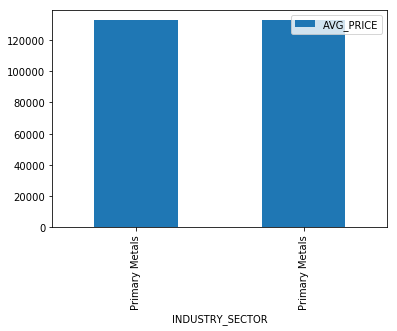

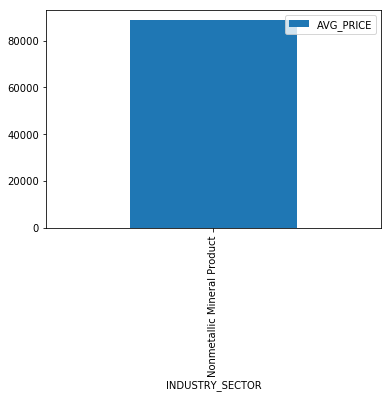

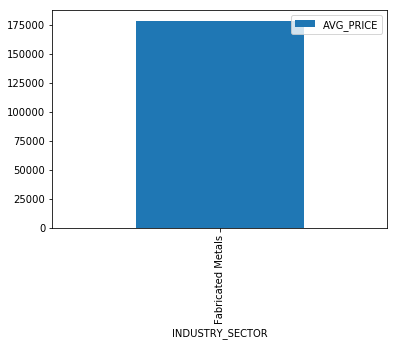

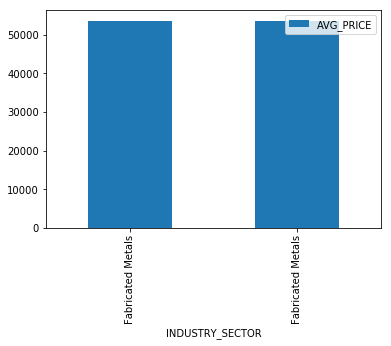

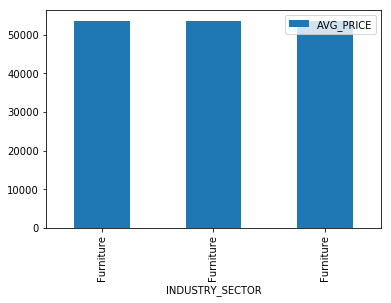

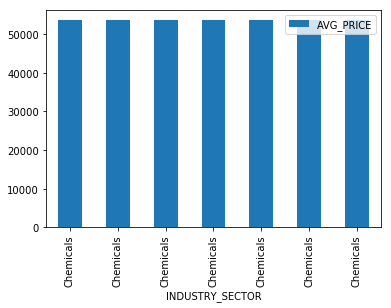

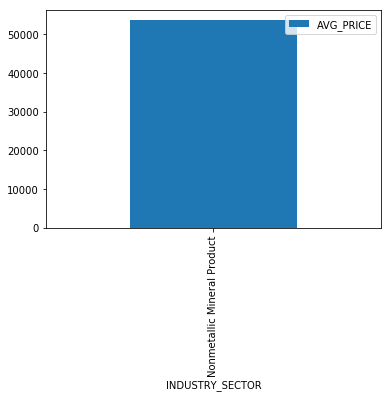

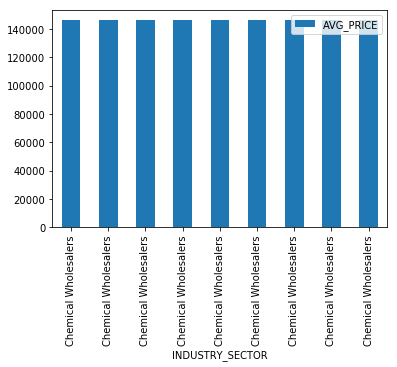

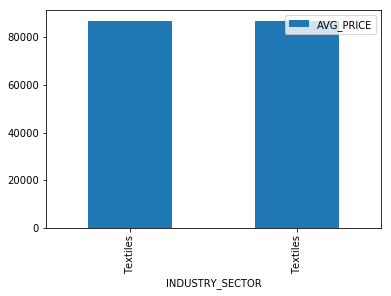

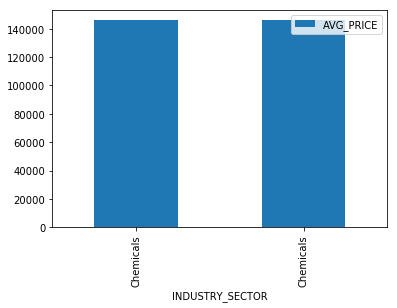

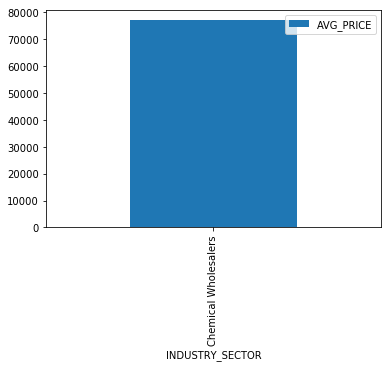

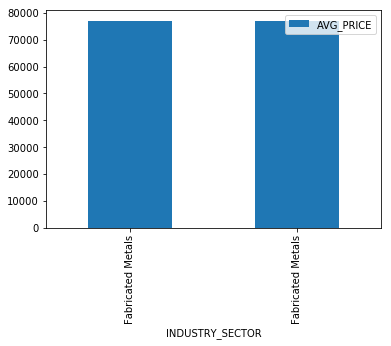

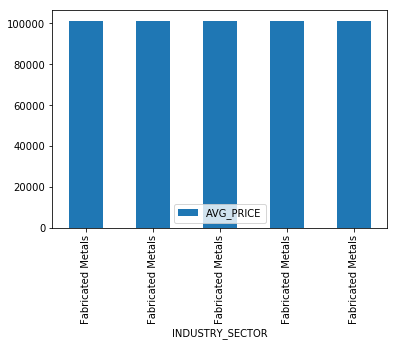

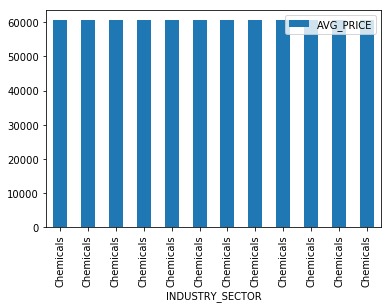

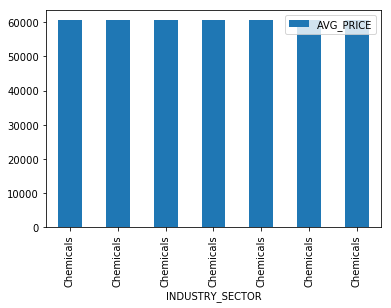

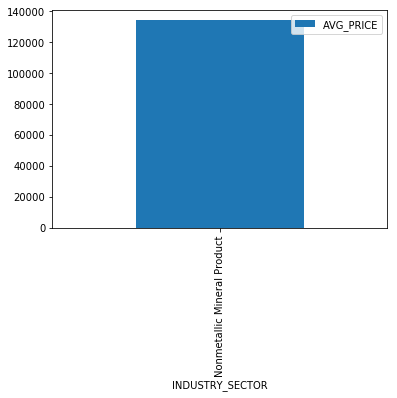

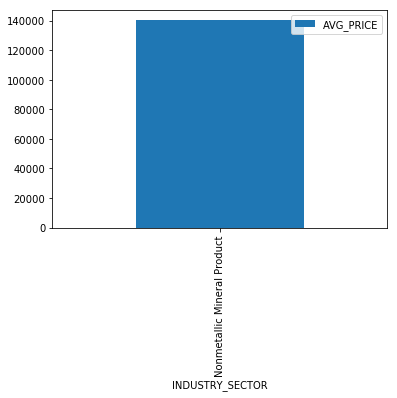

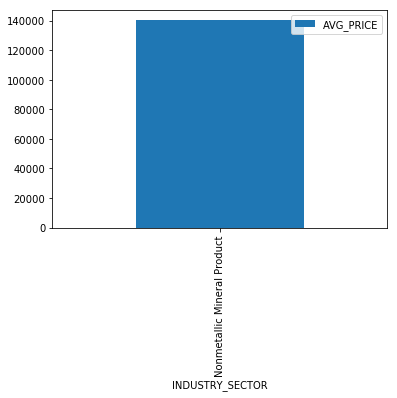

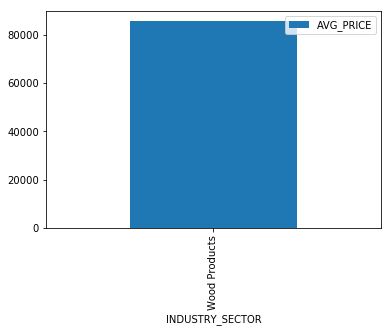

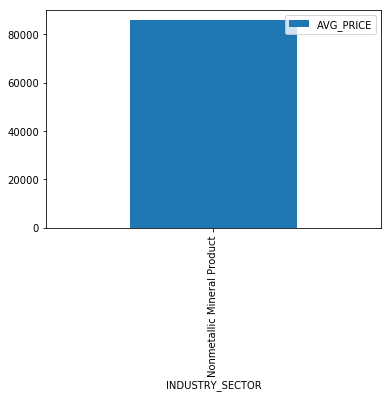

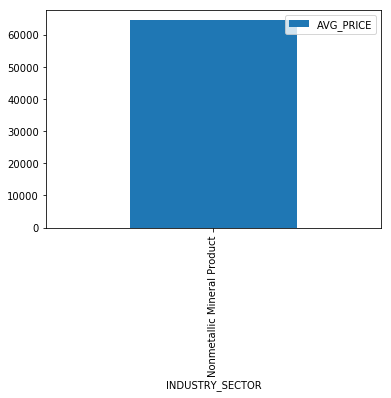

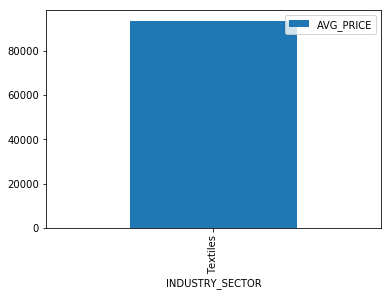

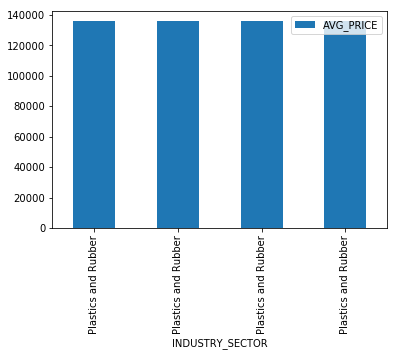

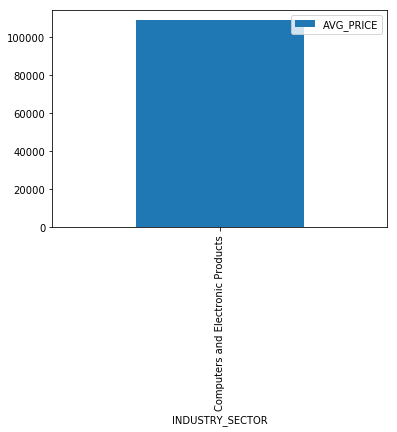

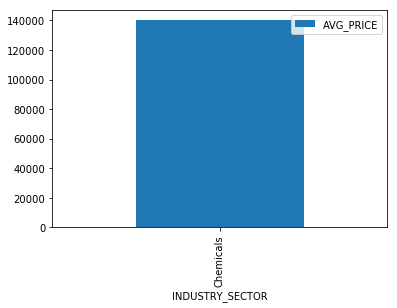

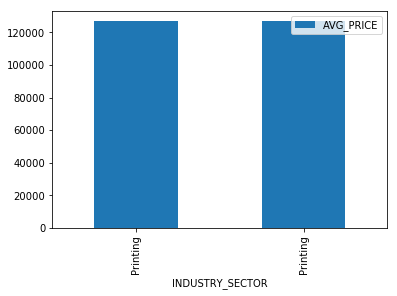

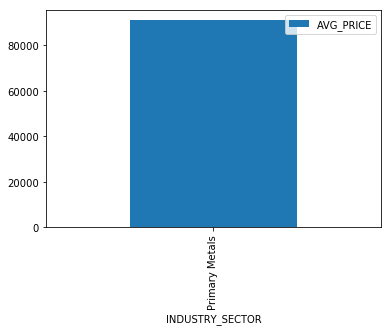

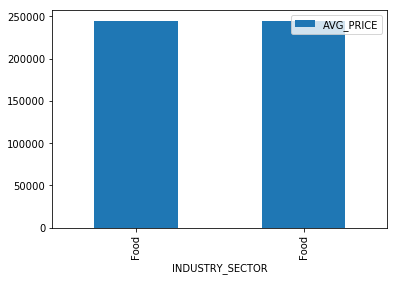

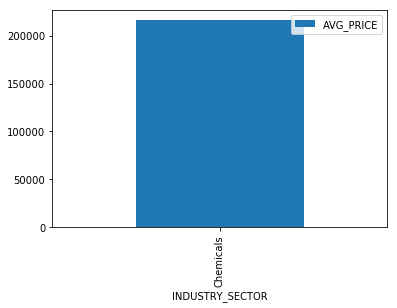

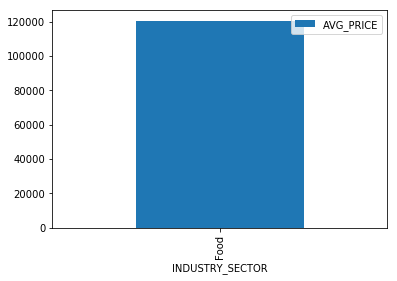

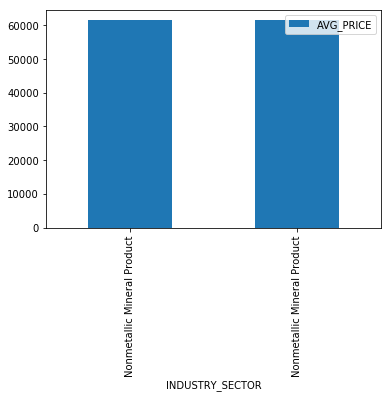

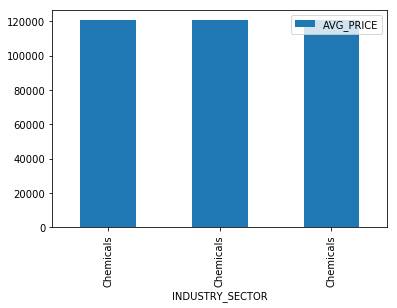

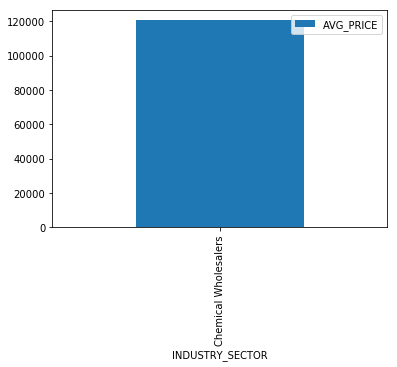

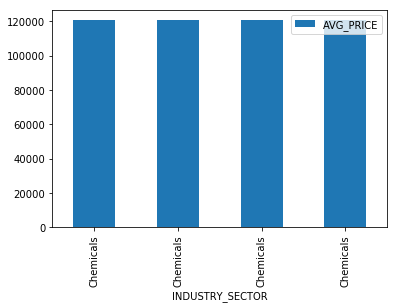

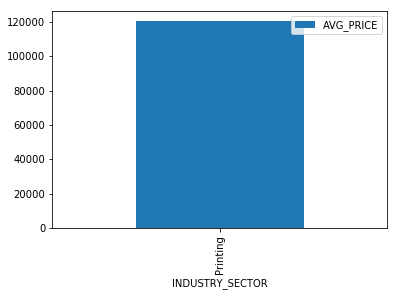

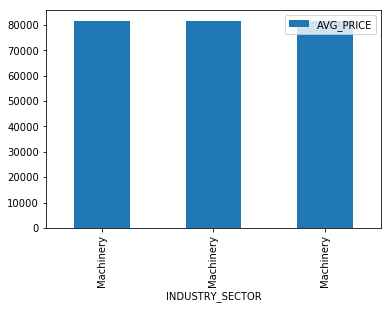

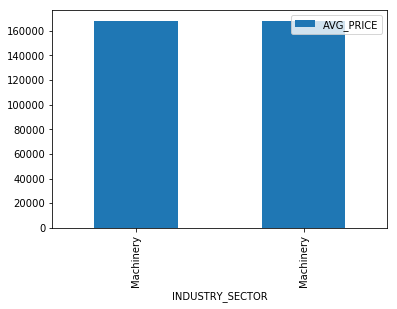

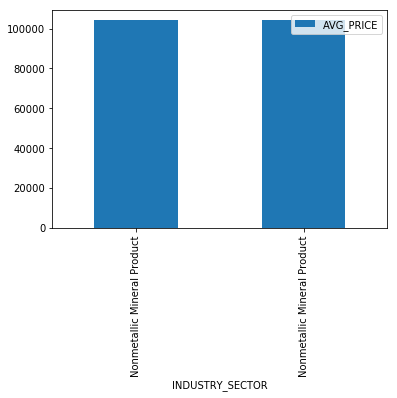

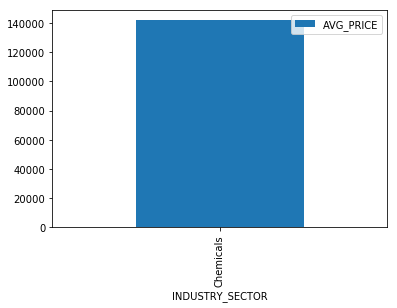

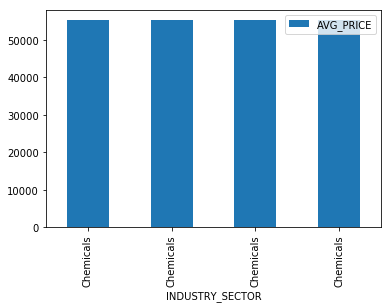

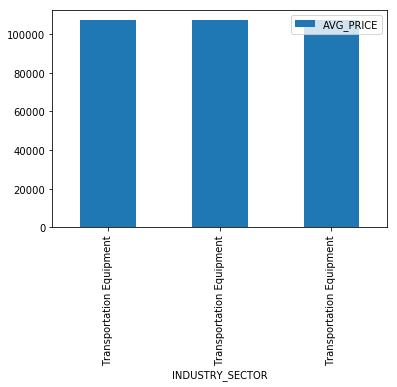

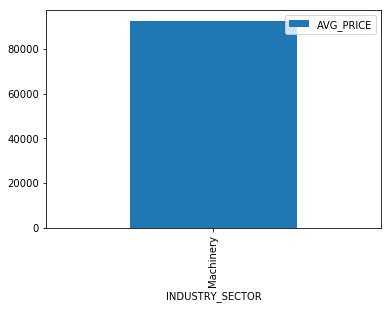

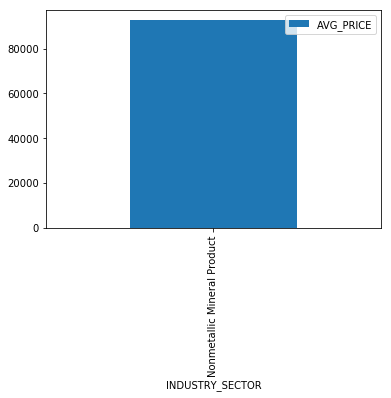

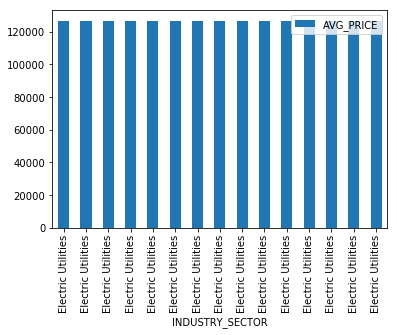

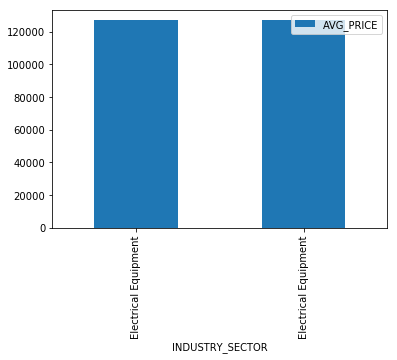

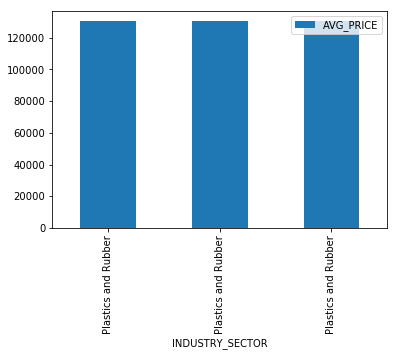

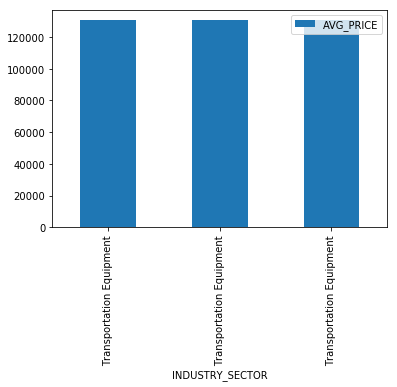

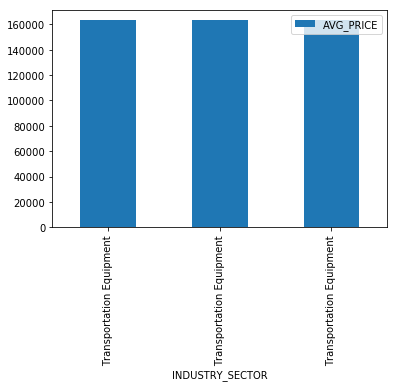

In [49]:
data_within_1_mile.groupby('TRI_FACILITY_ID').plot(x='INDUSTRY_SECTOR',y='AVG_PRICE',kind = 'bar')

INDUSTRY_SECTOR
Chemical Wholesalers                 Axes(0.125,0.125;0.775x0.755)
Chemicals                            Axes(0.125,0.125;0.775x0.755)
Computers and Electronic Products    Axes(0.125,0.125;0.775x0.755)
Electric Utilities                   Axes(0.125,0.125;0.775x0.755)
Electrical Equipment                 Axes(0.125,0.125;0.775x0.755)
Fabricated Metals                    Axes(0.125,0.125;0.775x0.755)
Food                                 Axes(0.125,0.125;0.775x0.755)
Furniture                            Axes(0.125,0.125;0.775x0.755)
Machinery                            Axes(0.125,0.125;0.775x0.755)
Nonmetallic Mineral Product          Axes(0.125,0.125;0.775x0.755)
Plastics and Rubber                  Axes(0.125,0.125;0.775x0.755)
Primary Metals                       Axes(0.125,0.125;0.775x0.755)
Printing                             Axes(0.125,0.125;0.775x0.755)
Textiles                             Axes(0.125,0.125;0.775x0.755)
Transportation Equipment             Axes(0.12

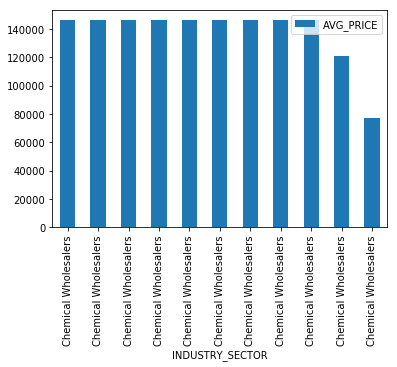

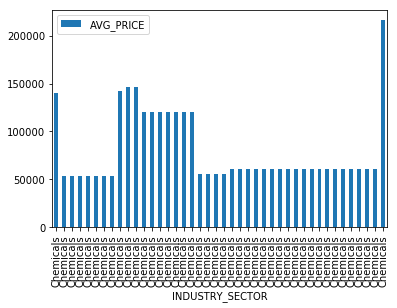

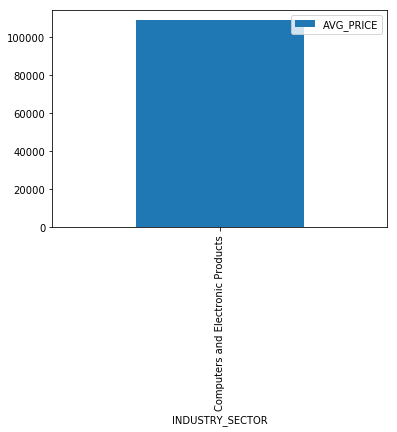

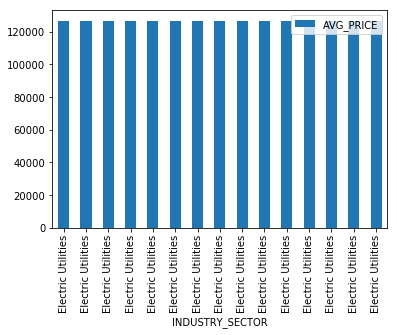

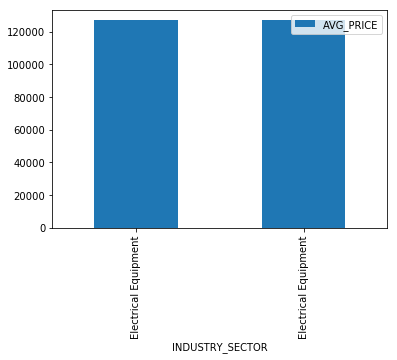

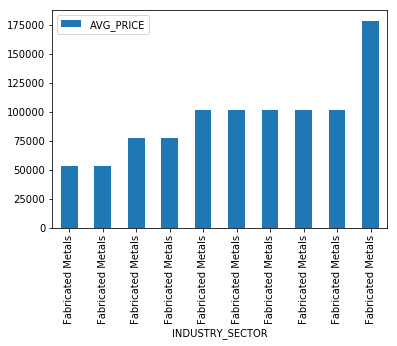

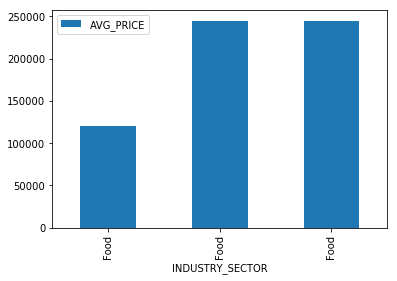

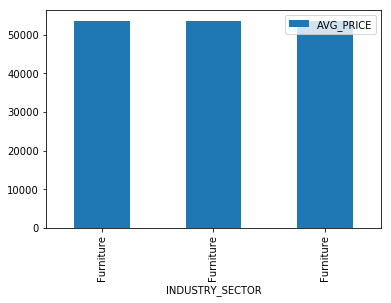

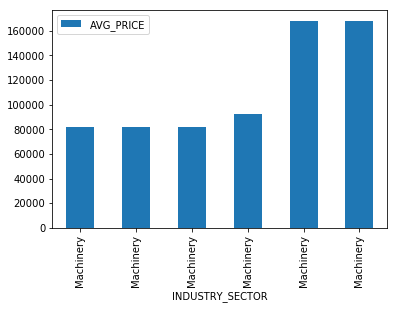

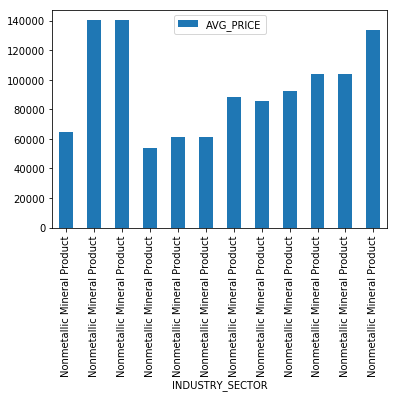

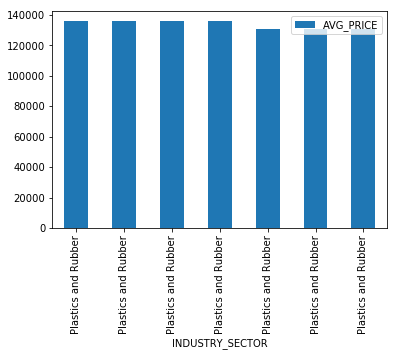

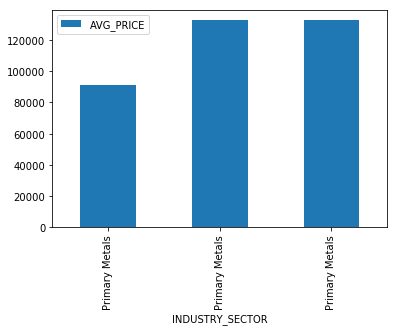

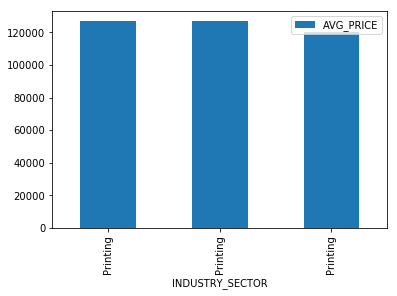

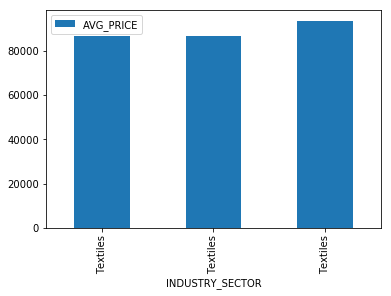

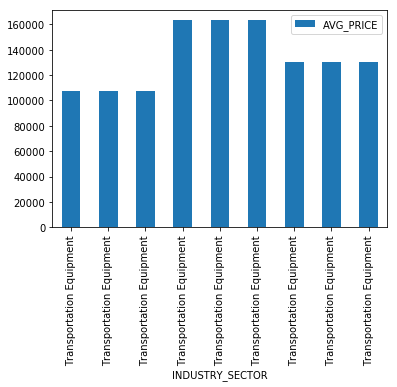

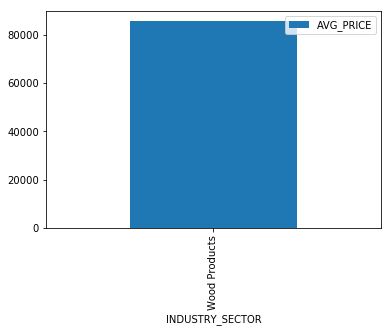

In [50]:
data_within_1_mile.groupby('INDUSTRY_SECTOR').plot(x='INDUSTRY_SECTOR',y='AVG_PRICE',kind = 'bar')

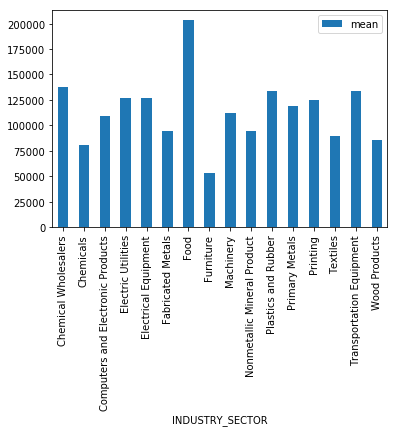

In [51]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [29]:
data_within_2_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=1) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)]

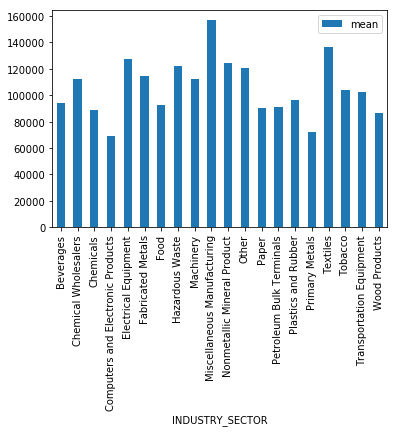

In [30]:
data_within_2_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [31]:
data_within_3_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=2) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <3)]

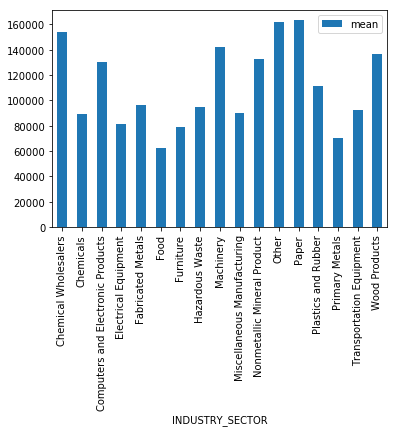

In [32]:
data_within_3_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [33]:
data_within_4_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=3) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)]

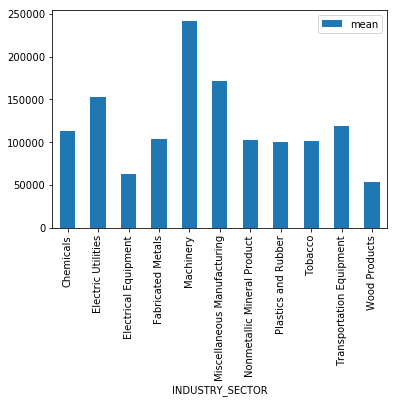

In [34]:
data_within_4_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [35]:
data_within_5_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=4) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <5)]

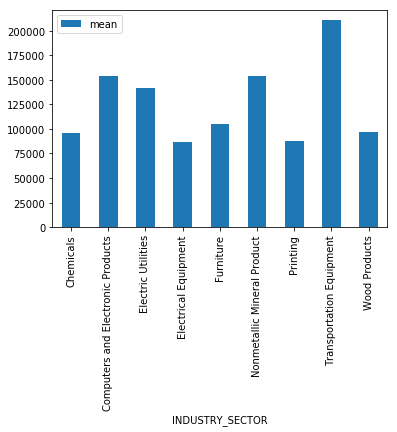

In [36]:
data_within_5_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [37]:
data_within_6_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=5) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <6)]

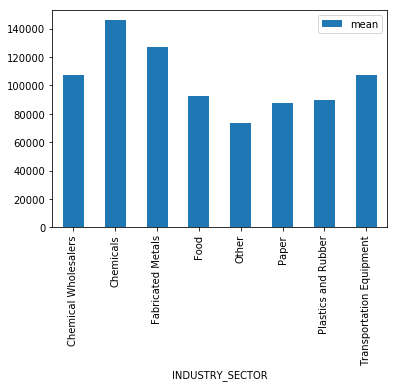

In [38]:
data_within_6_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [39]:
data_within_7_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=6) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <7)]

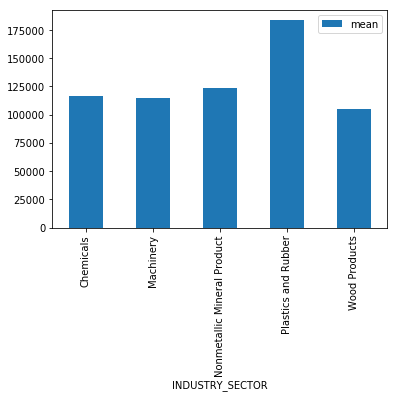

In [40]:
data_within_7_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [41]:
data_within_10_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=7) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <10)]

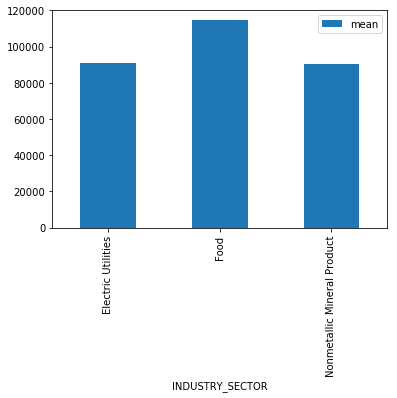

In [42]:
data_within_10_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

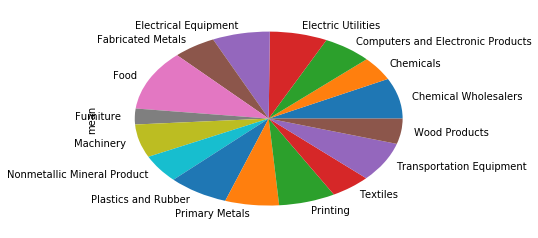

In [65]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

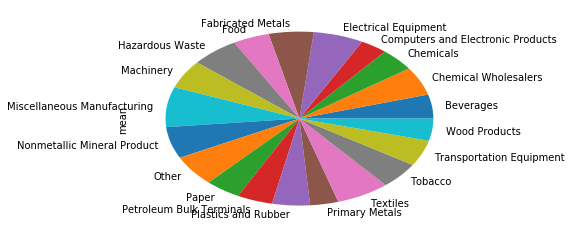

In [64]:
data_within_2_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

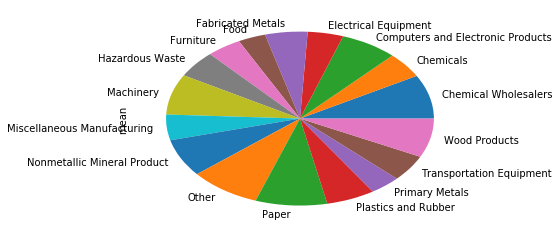

In [63]:
data_within_3_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' 
                                                                                    )

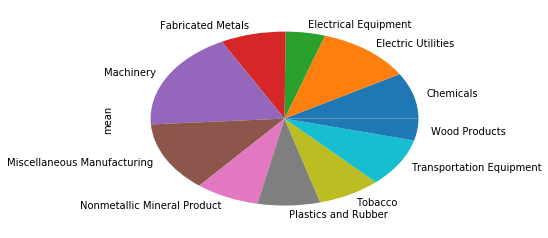

In [62]:
data_within_4_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

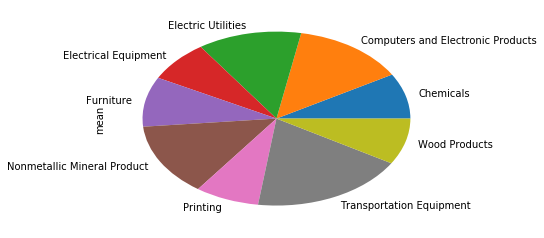

In [61]:
data_within_5_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

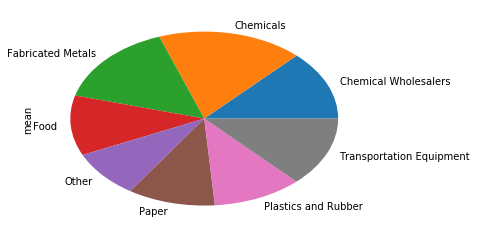

In [60]:
 data_within_6_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' 
                                                                                     )

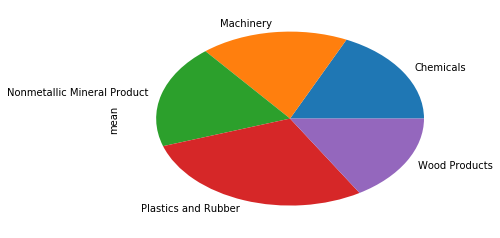

In [59]:
data_within_7_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )